In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import log, dot, e

In [2]:
#Input dataset yang ada di soal
df = {
    "gmat" : [780, 750, 690, 710, 680, 730, 690, 720, 740, 690, 610, 690, 710, 680, 770, 610, 580, 650, 540, 590, 620, 600, 550, 550, 570, 670, 660, 580, 650, 660, 640, 620, 660, 660, 680, 650, 670, 580, 590, 690],
    "gpa" : [4, 3.9, 3.3, 3.7, 3.9, 3.7, 2.3, 3.3, 3.3, 1.7, 2.7, 3.7, 3.7, 3.3, 3.3, 3, 2.7, 3.7, 2.7, 2.3, 3.3, 2, 2.3, 2.7, 3, 3.3, 3.7, 2.3, 3.7, 3.3, 3, 2.7, 4, 3.3, 3.3, 2.3, 2.7, 3.3, 1.7, 3.7],
    "work_experience" : [3, 4, 3, 5, 4, 6, 1, 4, 5, 1, 3, 5, 6, 4, 3, 1, 4, 6, 2, 3, 2, 1, 4, 1, 2, 6, 4, 1, 6, 5, 1, 2, 4, 6, 5, 1, 2, 1, 4, 5],
    "admitted" : [1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1]
}

dataset = pd.DataFrame(df, columns = ["gmat", "gpa", "work_experience", "admitted"])
#Print dataset
dataset

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [3]:
#Tentukan independent dan dependent variable
X = dataset[["gmat", "gpa", "work_experience"]]
y = dataset["admitted"]

In [4]:
X

,gmat,gpa,work_experience
0,780,4.0,3
1,750,3.9,4
2,690,3.3,3
3,710,3.7,5
4,680,3.9,4
5,730,3.7,6
6,690,2.3,1
7,720,3.3,4
8,740,3.3,5
9,690,1.7,1


In [5]:
y

0     1
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     1
9     0
10    0
11    1
12    1
13    0
14    1
15    0
16    0
17    1
18    0
19    0
20    1
21    0
22    0
23    0
24    0
25    1
26    1
27    0
28    1
29    1
30    0
31    0
32    1
33    1
34    1
35    0
36    0
37    0
38    0
39    1
Name: admitted, dtype: int64

In [6]:
#Bagi data menjadi data training dan testing, data testing sebesar 30% dan training 70%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)    
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.theta))
    def predict(self, X):
        return self.predict_prob(X).round()

In [8]:
regr = LogisticRegression()
regr.fit(x_train, y_train)

<ipython-input-7-397458e956d1>:13: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
<ipython-input-7-397458e956d1>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [9]:
#Bagi data menjadi data training dan validation, data validation sebesar 30% dan training 70%
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)

In [10]:
y_pred = regr.predict(x_val)

<ipython-input-7-397458e956d1>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

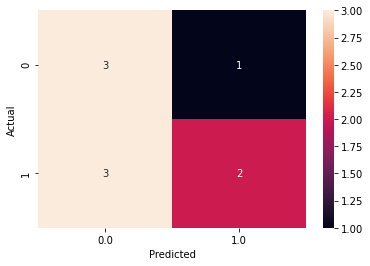

In [11]:
#Print confusion matrix
df_confusion = pd.crosstab(y_val, y_pred, rownames=['Actual'], colnames=['Predicted'])
# df_confusion
import seaborn as sns
sns.heatmap(df_confusion, annot=True)

In [12]:
#Hasil yang didapat yaitu: True Positives = 3 
#True Negatives = 2 False Positives = 1 False Negatives = 3

In [13]:
df = pd.DataFrame({"Actual" : y_val, "Predicted" : y_pred})
df

,Actual,Predicted
39,1,1.0
21,0,0.0
32,1,0.0
12,1,1.0
16,0,1.0
14,1,0.0
9,0,0.0
7,1,0.0
6,0,0.0


In [14]:
#Terdapat 4 prediksi yang salah dan 5 prediksi yang benar

In [15]:
acc = (df_confusion.iloc[0,0]+df_confusion.iloc[1,1])/y_val.count()
print("Accuracy: ", acc)

Accuracy:  0.5555555555555556


In [16]:
#Input testing dataset
df_new = {
    "gmat" : [590, 740, 680, 610, 710],
    "gpa" : [2, 3.7, 3.3, 2.3, 3],
    "work_experience": [3, 4, 6, 1, 5]
}

dataset_new = pd.DataFrame(df_new, columns = ["gmat", "gpa", "work_experience"])
dataset_new

,gmat,gpa,work_experience
0,590,2.0,3
1,740,3.7,4
2,680,3.3,6
3,610,2.3,1
4,710,3.0,5


In [17]:
y_pred = regr.predict(dataset_new)

<ipython-input-7-397458e956d1>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [18]:
admitted = pd.DataFrame({"admitted" : y_pred})
admitted

,admitted
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0


In [19]:
#Menunjukan 2 orang diterima dan 3 orang tidak diterima

In [20]:
#PERBANDINGAN KETIKA MENGGUNAKAN SKLEARN

In [21]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
regr1 = LogisticRegression()
print(regr1.fit(x_train, y_train))

LogisticRegression()


In [22]:
y_pred1 = regr1.predict(x_val)

<AxesSubplot:>

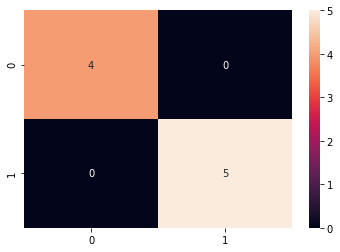

In [23]:
#Print confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf= confusion_matrix(y_val, y_pred1)
sns.heatmap(conf, annot=True)

In [24]:
#Hasil yang didapat yaitu: True Positives = 4 
#True Negatives = 5 False Positives = 0 False Negatives = 0

In [25]:
#Print akurasi yang didapat
accsklearn = metrics.accuracy_score(y_val, y_pred1)
print('Accuracy: ', accsklearn)
plt.show()

Accuracy:  1.0


In [26]:
df1 = pd.DataFrame({"Actual" : y_val, "Predicted" : y_pred1})
df1

,Actual,Predicted
39,1,1
21,0,0
32,1,1
12,1,1
16,0,0
14,1,1
9,0,0
7,1,1
6,0,0


In [27]:
#Semua prediksi benar

In [28]:
y_pred1 = regr1.predict(dataset_new)

In [29]:
admitted1 = pd.DataFrame({"admitted" : y_pred1})
admitted1

,admitted
0,0
1,1
2,1
3,0
4,1


In [30]:
#Menunjukan 3 orang diterima dan 2 orang tidak diterima

In [31]:
#PERBANDINGAN 

In [32]:
banding = pd.DataFrame({"admitted" : y_pred, "admitted skelarn" : y_pred1})
banding

,admitted,admitted skelarn
0,0.0,0
1,0.0,1
2,1.0,1
3,0.0,0
4,1.0,1


In [33]:
#Hasil dari perbandingan admitted dari data testing yang tidak menggunakan 
#sklearn dan menggunakan sklearn menunjukan 1 hasil yang berbeda.

#Akurasi yang didapat ketika menggunakan sklearn (100%) lebih tinggi 
#dibandingkan ketika tidak menggunakan sklearn (55%).